In [15]:
#Import Necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [17]:
#Load and see the first five record's of the dataset
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [19]:
#See the last five record's of the dataset 
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [21]:
#Drop the unnecessary feature
new_df = df.drop(['Unnamed: 0'], axis=1)

In [23]:
#See the first five record's of the dataset after the droping a variable 
new_df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


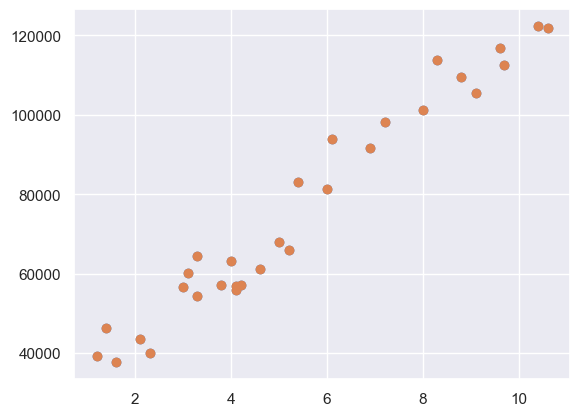

In [27]:
#Make the scatter plot to see the spread of the data on graph 
plt.scatter(new_df['YearsExperience'], new_df['Salary'])
plt.show()

In [29]:
#Check the null values in the dataset
new_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [31]:
#Check the count, mean, standard deviation, minimum, maximum, Q1, Q2, and Q3 values
new_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


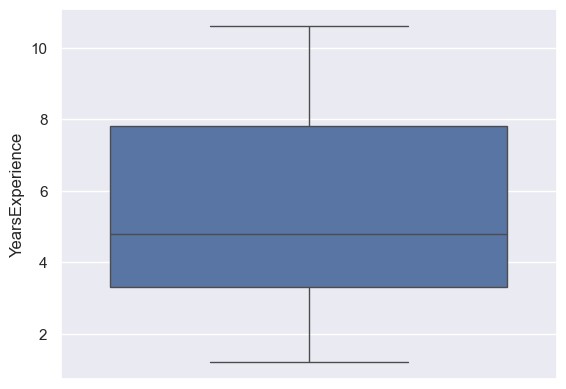

In [37]:
#Make the boxplot to check the outlier 
sns.boxplot(y = 'YearsExperience', data = new_df)
plt.show()

In [39]:
#Split the data into independent and dependent variable 
x = new_df.iloc[:,0:1]    #Independent variable 
y = new_df.iloc[:,-1]     #Dependent variable 

In [41]:
#Check the first five record's of the independent variable 
x.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [83]:
#Check the first five record's of the dependent variable 
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [171]:
#Split the data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

In [173]:
#Check the x_train data 
x_train

,YearsExperience
26,9.6
16,5.2
25,9.1
28,10.4
10,4.0
3,2.1
1,1.4
19,6.1
22,8.0
12,4.1


In [175]:
#Check the y_train data
y_train

26    116970.0
16     66030.0
25    105583.0
28    122392.0
10     63219.0
3      43526.0
1      46206.0
19     93941.0
22    101303.0
12     56958.0
5      56643.0
14     61112.0
0      39344.0
21     98274.0
4      39892.0
8      64446.0
13     57082.0
9      57190.0
15     67939.0
29    121873.0
23    113813.0
6      60151.0
17     83089.0
11     55795.0
Name: Salary, dtype: float64

In [183]:
#Checks the number of row's and column's in the training and testing phase
x_train.shape, y_test.shape

((24, 1), (6,))

In [191]:
#Build the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [193]:
#Predict the x_test data to check the accuracy 
y_pred = model.predict(x_test)

In [195]:
#Import the accuracy measure method to check the accuracy of simple linear regression model (r2_score)
from sklearn.metrics import r2_score

In [197]:
#Calculate the accuracy of the model 
print("Accuracy is", r2_score(y_test, y_pred))

Accuracy is 0.993422386435995


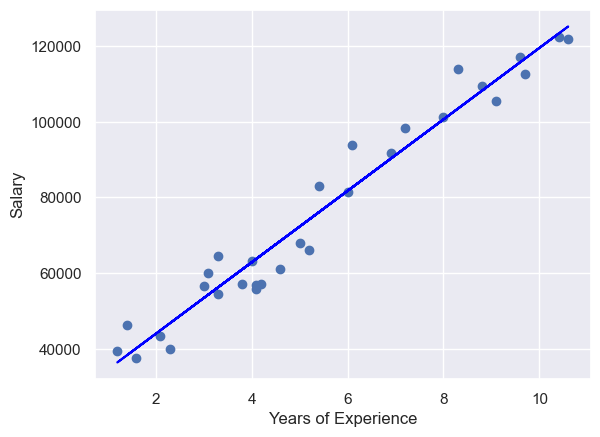

In [205]:
#Make thr best fit line in the graph 
plt.scatter(new_df['YearsExperience'], new_df['Salary'])
plt.plot(x_train, model.predict(x_train), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [207]:
#Formula of simple linear regression -> y = mx + c
#y = Output
#m = slope
#x = input value
#c = Intercept 
m = model.coef_
c = model.intercept_
print("The value of m is:", m)
print("The value of c is:", c)

The value of m is: [9440.46383365]
The value of c is: 25097.021274056402


In [215]:
#Example (Year's of Experience = 6)
salary = m*6+c
print(salary)

[81739.80427593]
